# Homework 2: Neural Named Entity Recognition (NER)
## CS4740/5740 Fall 2022

## Grouping deadline: Monday Oct 5, 11:59pm on CMS 

## Project Submission Due: ~~Thursday Oct 20~~ Tue Oct 25, 11:59pm (probably CMS+Gradescope, details TBA)

**We highly recommend you complete parts 1-3 by Tue Oct 4, as preparation for the midterm on Oct 6.**  But you don't have to turn anything in; we understand it's prelim season.

**Names:**

**Netids:**


**Editing your version of this notebook:** One partner should make a copy of this notebook and share it with your partner.  **However**, because of synchronization issues (even though Colab works with Google Drive), changes made in this notebook at the same time from different computers/browser windows may not save. We will go so far as to recommend that you close the tab with this notebook when you are not working on it so your partner doesn't face sync issues.

**Collaboration policy:** please be sure to check the collaboration policy on the [course website](https://courses.cs.cornell.edu/cs4740/2022fa/)!

**Coding cells:** Any cells that require you to code will have the `### TODO : [description] ###` comment, where the `[description]` varies per cell.

**Cell Outputs:** For grading (aka to help us give you partial credit), please ensure the final cell outputs are present for all cells in the notebook you submit.

**Teams/groups:** Everyone resets to a "singleton" when each new assignment is released.  If you want to have a partner for HW2, regardless of whether it's a previous homework partner or a new one, you must do the CMS invite/accept process anew.

Code of Academic Integrity:  **Do not copy code from online or share code with students other than your designated partner**. We will be running programs to detect plagiarism.

> Assignment authors & testers: CS 4740/5740 professors and TAs from this and previous semesters, John Chung, Renee Shen, John R. Starr, as well as Tushaar Gangavarapu, Fangcong Yin, and Shaden Shaar.

# **Introduction** 🔎 
---

This project serves as a neural complement of HW1. In HW1, you  implemented HMM and MEMM models that performed Named Entity Recognition (NER). In this project, your task is to develop neural models that identify named entities and assign them the appropriate label: **B-ORG, I-ORG, B-PER, I-PER, B-LOC, I-LOC, B-MISC, I-MISC** or **O**.

A goal of this assignment is to compare your neural models with your previous HMM and MEMM model. As such, we're using the same dataset as in HW1. 


For this project, you will implement three neural models:
- Model 1 : a feed-forward neural network (FFNN)
- Model 2 : a recurrent neural network (RNN)
- Model 3 : a second recurrent neural network (RNN2) with variable number of hidden layers.


For all three models, you will implement and train these three sequence-tagging models. However, you will only generate your predictions for the provided test set with the FFNN and the first RNN models; these predictions will be submitted to [**Kaggle**](https://www.kaggle.com/t/4d2c7eeebdfc4e789d79d3a96299dbb0). Note that you will not submit predictions on the full test set for the second RNN (RNN2). Please enter all code and answer all the questions in this colab notebook.

Additionally, both your FFNN and RNN models will be uploaded to **CMS**. *We are currently in the process of setting this up; an announcement will be made when this is available to you.*


For your reference, we recommend the following sections from the **Jurafsky & Martin** textbook (which can be found at [this link](https://web.stanford.edu/~jurafsky/slp3/)):
- For information on FFNNs: **7.3-7.8**
- For information on RNNs: **9.2-9.7**

Additionally, we encourage you to review the lecture slides, which can be found on the course website.

## **Advice**

---
1. We strongly encourage you to enable GPU support (Google Colab provides GPUs if you don't have them locally). To do so, go to `Runtime` --> `Change Runtime Type` --> Dropdown box below `Hardware Accelerator`. This will help your models train *much* faster!
2. Please read through the entire notebook before you start coding. That might inform your code structure.
3. An assignment outline and grading breakdown (subject to minor adjustments) is found below; please consult it.

<a name="outline"></a>
## **Assignment outline and grading breakdown**
- [Part 1](#part1)
  - [Q1](#q1) [5 pts]
  - [Q2](#q2) [3 pts]
  - [Writing Padding Function](#padding_func) [5 pts]
  - [Padding Data](#padding_data) [7 pts]
  - [Q3](#q3) [3 pts]
  - ~[Q4](#q4) [5 pts]~
- [Part 2](#part2)
  - [Initializing FFNN](#init_ffnn) [12 pts]
  - [Finding Four Errors](#four_errors) [12 pts]
  - [Q5](#q5) [8 pts]
- [Part 3](#part3)
  - [Training and Evaluating Your FFNN](#te_ffnn)[10 pts]
  - [Saving FFNN Model](#save_ffnn)[3 pts]
  - [Q6](#q6) [5 pts]
- [Part 4](#part4)
  - [Initializing RNN](#init_rnn) [15 pts]
  - [Writing Forward Function](#init_rnn) [20 pts]
  - [Training and Evaluating Your RNN](#te_rnn)[5 pts]
  - [Saving RNN Model](#save_rnn) [3 pts]
  - [Q7](#q7) [5 pts]
- [Part 5](#part5)
  - [Initializing RNN2](#init_rnn2) [10 pts]
  - [Writing Forward Function 2](#init_rnn2) [15 pts]
  - [Training and Evaluating Your RNN2](#te_rnn2) [5 pts]
  - [Q8](#q8) [5 pts]
  - [Visualizing Your Activations](#activ) [20 pts]
  - [Q9](#q9) [10 pts]

- [Part 6](#part6)
  - [Q10](#q10) [10 pts]
  - [Q11](#q11) [7 pts]
  - [Q12](#q12) [7 pts]
  - [Q13](#q13) [7 pts]
  - [Q14](#q14) [7 pts]
- [Part 7](#part7)

Outperforming our FFNN baseline on [Kaggle](https://www.kaggle.com/t/4d2c7eeebdfc4e789d79d3a96299dbb0) [5 pts]

Outperforming our RNN baseline on [Kaggle](https://www.kaggle.com/t/4d2c7eeebdfc4e789d79d3a96299dbb0) [10 pts]

**A brief note on the Kaggle baselines:** To give you some breathing room for your implementation, our baselines are *not* perfect implementations. Correct implementations should therefore outperform our baselines.

<a name="part1"></a>
[[^^^]](#outline) 
# **Part 1: Preparing Our Data**

In this part, you will convert the data into a format that can be passed through the basic feed-forward neural network (FFNN) of Part 2. Specifically, you will complete the following steps:

- Load in the data
- Convert the input tokens *and* labels into a numerical representation
- Pad the sentences 

Let's begin!

In [ ]:
# Installing gensim (if needed)
!pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 45.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# Tons and tons of imports!
from collections import Counter, namedtuple
from itertools import chain
import json
import math
import os
from pathlib import Path
from tqdm.notebook import tqdm, trange
from typing import List, Tuple, Dict, Set, Union
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.nn import init
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
import torch.nn.utils
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_packed_sequence, pack_padded_sequence

##1.1: Data Preparation
First, we need to load in the data from our Google Drive. Please adjust the following code to fit your drive's organization.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### TODO : please modify the line below with your drive organization ###
path = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks")

with open(os.path.join(path,'train.json'), 'r') as f:
     train = json.loads(f.read())

with open(os.path.join(path,'val.json'), 'r') as f:
     val = json.loads(f.read())

with open(os.path.join(path,'test.json'), 'r') as f:
     test = json.loads(f.read())

Mounted at /content/drive


## 1.2: Creating Vector Representations of the Data
Currently, the dataset has three fields: 
1. a 'text' field that is a list of a list of strings
2. an 'index' field that is a list of a list of integers
3. an 'NER' field that is a list of a list of strings

However, if we fed the model the data in its present form, it would be a disaster! Therefore, we must modify our data to a format that our models can comprehend. The following few subsections will ask you to complete smaller tasks to aid in your understanding of this process.

For your understanding, we have provided a visualization that shows the distribution of sentence lengths:

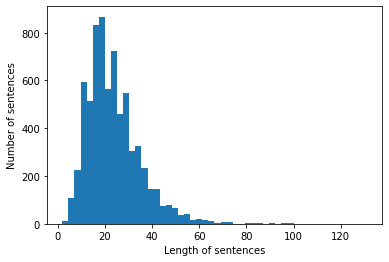

In [ ]:
plt.hist([len(sentence) for sentence in train['text']], bins=50)
plt.xlabel('Length of sentences')
plt.ylabel('Number of sentences')
plt.show()

<a name="q1"></a>
[[^^^]](#outline) 

### **Q1: On Embeddings for FFNN**
Describe why we cannot use string (categorical, string) data as inputs for our neural models and must instead use word embeddings.



#### **A1:** 
First of all, the string data as input cost a lot computationally compared with numerical input. Secondly, the string data cannot reflect the similarity of meaning between words, and then it would limit the prediction. The other reason is the input of neural network are real number.

The following `Vocab` class aids in processing your dataset. It has a number of essential functions, including:

- `__getitem__`
- `word_from_id`
- `add`
- `from_corpus`

Please familiarize yourself with these functions.

In [ ]:
UNK = "<UNK>"
PAD = "<PAD>"

class Vocab(object):
    """ Vocabulary, i.e. structure containing language terms.

      Instance attributes:
        word2id: dictionary mapping words to indices
        unk_id: index for UNK
        id2word: dictionary mapping indices to words

    """
    def __init__(self, word2id=None):
        """ Init Vocab Instance.
        
        :param word2id: dictionary mapping words 2 indices
        :type word2id: dict[str, int]
        """
        if word2id:
            self.word2id = word2id
        else:
            self.word2id = dict()
            self.word2id[PAD] = 0   # Pad Token
            self.word2id[UNK] = 1   # Unknown Token
        self.unk_id = self.word2id[UNK]
        self.id2word = {v: k for k, v in self.word2id.items()}

    def __getitem__(self, word):
        """ Retrieve word's index. Return the index for the unk
        token if the word is out of vocabulary.
        
        :param word: word to look up
        :type word: str
        :returns: index of word
        :rtype: int
        """
        return self.word2id.get(word, self.unk_id)

    def __contains__(self, word):
        """ Check if word is captured by Vocab.
        
        :param word: word to look up
        :type word: str
        :returns: whether word is in vocab
        :rtype: bool
        """
        return word in self.word2id

    def __setitem__(self, key, value):
        """ Raise error, if one tries to edit the Vocab directly.
        """
        raise ValueError('vocabulary is readonly')

    def __len__(self):
        """ Compute number of words in Voca.
        
        :returns: number of words in Vocab
        :rtype: int
        """
        return len(self.word2id)

    def __repr__(self):
        """ Representation of Vocab to be used
        when printing the object.
        """
        return 'Vocabulary[size=%d]' % len(self)

    def word_from_id(self, wid):
        """ Return mapping of index to word.
        
        :param wid: word index
        :type wid: int
        :returns: word corresponding to index
        :rtype: str
        """
        return self.id2word[wid]

    def add(self, word):
        """ Add word to Vocab, if it is previously unseen.
        
        :param word: to add to Vocab
        :type word: str
        :returns: index that the word has been assigned
        :rtype: int
        """
        if word not in self:
            wid = self.word2id[word] = len(self)
            self.id2word[wid] = word
            return wid
        else:
            return self[word]

    ############################################################################
    #######################            CHANGED            ######################
    ############################################################################
    @staticmethod
    def from_corpus(corpus, remove_frac=None, freq_cutoff=None): 
        """ Given a corpus construct a Vocab.
        
        :param corpus: corpus of text produced by read_corpus function
        :type corpus: List[str]
        :param freq_cutoff: if word occurs n < freq_cutoff times, drop the word
        :type freq_cutoff: int
        :returns: Vocab instance produced from provided corpus
        :rtype: Vocab
        """
        vocab_entry = Vocab()
        word_freq = Counter(chain(*corpus))
        if freq_cutoff is None:
            freq_cutoff = 1
        valid_words = [w for w, v in word_freq.items() if v >= freq_cutoff]
        print('number of word types: {}, number of word types w/ frequency >= {}: {}'
              .format(len(word_freq), freq_cutoff, len(valid_words)))
        top_words = sorted(valid_words, key=lambda word: word_freq[word], reverse=True)
        if remove_frac is not None:
            size = len(top_words) - int(remove_frac * len(top_words))
            top_words = top_words[:size]
            print(f'number of unique words retained with remove_frac={remove_frac}: {len(top_words)}')
        for word in top_words:
            vocab_entry.add(word)
        return vocab_entry

In [ ]:
################################################################################
#########################             ADDED             ########################
################################################################################
def tokenize_sentences(sentences, vocab):
    output = []
    for sentence in sentences:
        tokenized_sentence = [vocab[w] for w in sentence]
        output.append(tokenized_sentence)
    return output

<a name="padding_func"></a>
[[^^^]](#outline) 
### **1.2.1 Padding Sentences**
Next, we need to write a function that will pad our sentences to the length of the longest sentence in the training data. For example, say the longest sentence in our dataset was "The quick brown fox jumped over the lazy dog" (*len* = 9). Then, if given the sentence "The quick brown fox jumped", we would pad the sentence to: "The quick brown fox jumped `<PAD>` `<PAD>` `<PAD>` `<PAD>`".

<a name="q2"></a>
[[^^^]](#outline) 

### **Q2: On Padding Embeddings**

Why must we pad our embeddings to the length of the longest sentence in the training data? What issues might we encounter if we do not?

#### **A2:** 
Because the input layer of neural network is fixed size, so we should pad the sentence to the longest one with the same size, and the input size is the longest length of sentence. And why we choose the longest sentence, it's because if we choose the shorter one, we need to truncate the sentence to make sentence same, and this could lead to the information loss

In the following code block, determine the longest sentence in the training data and write a function that adds the `pad_token` the appropriate number of times to sentences that are shorter than the longest sentence.

In [ ]:
### TODO : Determine the longest sentence in the training data and assign it to the variable max_len ###
max_len = -1
for words in train['text']:
  max_len= max(max_len, len(words))
print(max_len)

def pad_sents(sents, pad_token, max_len):
    """ Pad list of sentences according to the longest sentence in the batch.
        The paddings should be at the end of each sentence.
    
    Arguments:
      sents(list[list[str]]): list of sentences, where each sentence
                                    is represented as a list of words
      pad_token(str): padding token

      max_len(int): length of the longest sentence in the dataset

    Returns:
      sents_padded(list[list[str]]): list of sentences where sentences shorter
        than the max length sentence are padded out with the pad_token, such that
        each sentence in the batch now has equal length.
    """
    ### TO DO: Write a function that will pad the sentences according to the longest sentence in the training data ###
    sents_padded=[]
    for i in range(len(sents)):
      tmp=[word for word in sents[i]]
      for j in range(len(sents[i]), max_len):
        tmp.append(pad_token)
      sents_padded.append(tmp)
    return sents_padded
sents_padded= pad_sents(train['text'], '<PAD>', max_len)

131


After padding the data you need to create a mask that indicated which tokens are original tokens and which are padding. This is used so that when you backpropagate, you do not backpropagate on the padded tokens:

In [ ]:
################################################################################
#########################             ADDED             ########################
################################################################################
def get_masks(sents_padded, pad_token):
    """ Create masks for a list of sentences according to the longest sentence 
        in the training data.
        The mask should be a binary array.
    
    Arguments:
      sents_padded(list[list[str]]): list of sentences where sentences shorter
        than the max length sentence are padded out with the pad_token, such that
        each sentence in the batch now has equal length.

      pad_token(str): padding token

    Returns:
      sents_masks(list[list[Int]]): list of 0/1 where words shorter
        than the max length in the sentence are denoted as 1 and 0 otherwise.
    """
    all_masks = []
    for sent in sents_padded:
      all_masks.append([0 if w == pad_token else 1 for w in sent])
    return all_masks
all_masks = get_masks(sents_padded, '<PAD>')

### **1.2.2 Converting Labels to Numerical Values**
In addition to converting our tokens to vector representations, we need to convert our predicted labels to numerical representations as well. For example, say we have two labels: "O", "B-ORG". We could numerically represent these labels in a dictionary: `{"O":0, "B-ORG":1}`


<a name="q3"></a>
[[^^^]](#outline) 
### **Q3: On Making Predicted Labels Numerical**
Why do we need to convert our predicted labels into a numerical representation?

#### **A3:** 
Neural network will predict with map the probability of occurrence of each category. and the ouput should be a matrix containing these probability. So we need to convert the labels into numerical representation in the first, so that we could assign blame to some position of matrix which represent the specific label. Also in the end, we could make interpretation of which category has the highest probability.

In the following code, write a function that takes in the NER labels for each item in the dataset and converts it to the appropriate numerical label as defined in `category_map`:

In [ ]:
category_map = {"O": 0,
                "B-ORG": 1,
                "I-ORG": 2,
                "B-PER": 3,
                "I-PER": 4,
                "B-LOC": 5,
                "I-LOC": 6,
                "B-MISC": 7,
                "I-MISC": 8}

def encode_ner_category(category_data: List[List[str]])->List[List[int]]:
  """ Encoding NER category from a list of strings to a list of integers

  Arguments: 
    category_data (list(list(str))): NER categories

  Returns:
    encoded category (list(list(int))): Numerical conversions of NER categories
  """

  ### TODO : write a function that converts NER labels to integers ###
  encoded_category= []
  for i in range(len(category_data)):
    tmp=[]
    for j in range(len(category_data[i])):
      tmp.append(category_map[category_data[i][j]])
    encoded_category.append(tmp)
  return encoded_category
encoded_category= encode_ner_category(train['NER'])
print(encoded_category[1])




[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0]


<a name="padding_data"></a>
[[^^^]](#outline) 
### **1.2.3: Data Processing, Padding Data**

In this section, we will construct new `processed_train` and `processed_val` datasets which will pad both input 'text' and expected output 'NER'. The 'text' portion of the data should be padded with the `<PAD>` token, and the 'NER' portion of the data should be padded with 0. 

**NOTE: PLEASE DO NOT MODIFY ANY INSTANCES OF `torch.manual_seed(123)`, as this will affect the output of your model and therefore cause issues with the autograder!**

In [ ]:
# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)

################################################################################
#########################            CHANGED            ########################
################################################################################
print('initialize train vocabulary ..')
vocab = Vocab.from_corpus(train['text'], remove_frac=0.5)

initialize train vocabulary ..
number of word types: 24823, number of word types w/ frequency >= 1: 24823
number of unique words retained with remove_frac=0.5: 12412


In the following code block, fill in the processed_train and process_val dictionaries with padded and encoded representations for both the NER and text labels. 

In [ ]:
### TODO : Create two dictionaries (processed_train & processed_val) that have 'NER' and 'text' as keys and padded sentences as items. 
### TODO : Pad the training and testing text and NER labels, and add them to the new dictionaries.

################################################################################
#########################            CHANGED            ########################
################################################################################
processed_train = dict()
processed_val = dict()
processed_test = dict()
processed_train['text']= pad_sents(train['text'], '<PAD>', max_len)
encoded_train= encode_ner_category(train['NER'])
category_train=[]
for i in range(len(encoded_train)):
  tmp=[l for l in encoded_train[i]]
  for j in range(len(encoded_train[i]), max_len):
    tmp.append(0)
  category_train.append(tmp)
processed_train['NER']= category_train

processed_val['text']= pad_sents(val['text'], '<PAD>', max_len)
encoded_val= encode_ner_category(val['NER'])
category_val=[]
for i in range(len(encoded_val)):
  tmp=[l for l in encoded_val[i]]
  for j in range(len(encoded_val[i]), max_len):
    tmp.append(0)
  category_val.append(tmp)
processed_val['NER']= category_val

processed_test['text']= pad_sents(test['text'], '<PAD>', max_len)
# processed_train = dict()
# processed_train['NER'] = '' # TO DO: labels (list(list(int)))
# processed_train['text'] = '' # TO DO: padded sentences
processed_train['text-tokenized'] = tokenize_sentences(processed_train['text'], vocab)
processed_train['mask'] = get_masks(processed_train['text'], PAD)
#processed_val = dict()
# processed_val['NER'] = '' # TO DO: labels (list(list(int)))
# processed_val['text'] = '' # TO DO: padded sentences
processed_val['text-tokenized'] = tokenize_sentences(processed_val['text'], vocab)
processed_val['mask'] = get_masks(processed_val['text'], PAD)
#processed_test = dict()
processed_test['NER'] = [] # DO NOT MODIFY
# processed_test['text'] = '' # TO DO: padded sentences
processed_test['text-tokenized'] = tokenize_sentences(processed_test['text'], vocab)
processed_test['mask'] = get_masks(processed_test['text'], PAD)



### ~**1.2.4: Vectorizing Sentences**~

~We are finally ready to vectorize our sentences! To do so, we will first train a Word2Vec model on our training data.~

~**One more reminder: please keep/reset the seed value we've provided at the same value throughout all your code or our autograder will fail on your submission**.~


In [ ]:
################################################################################
#########################            REMOVED            ########################
################################################################################

# # Setting seed ***DO NOT MODIFY***
# torch.manual_seed(123)

# import gensim.models

# # Do not modify the `workers` kwarg in the following line:
# w2v_loader = gensim.models.Word2Vec(sentences=train['text'], sg=1, window=5, negative=5, vector_size=max_len, min_count=2, workers=1)

# word2vector = w2v_loader.wv
# word2vector[UNK] = np.mean([w2v_loader.wv[x] for x in w2v_loader.wv.key_to_index.keys()], axis=0)
# word2vector[PAD] = np.zeros_like(w2v_loader.wv['dog'])

<a name="q4"></a>
[[^^^]](#outline) 
### ~~**Q4: On Vectorizing UNK and PAD**~~
~~Explain what the final two lines in the code block above are doing. Why might we apply those techniques? Explain, and provide and justify a reasonable alternative approach for both UNK and PAD.~~

#### ~~**A4:**~~
~~... add your answers here.~~



At this point, we have ~trained our embeddings and~ processed our data. Let's get into it! ~In the next code blocks, we will initialize our embeddings and vectorize our sentences.~


In [ ]:
################################################################################
#########################            REMOVED            ########################
################################################################################
# # Setting seed ***DO NOT MODIFY***
# torch.manual_seed(123)

# # create our source embeddings from the vocab
# embeddings = torch.zeros((len(vocab), w2v_loader.vector_size))

# for id in vocab.id2word:
#     embeddings[id] = torch.tensor(word2vector[vocab.id2word[id]])

In [ ]:
################################################################################
#########################            REMOVED            ########################
################################################################################
# def vectorize_sents(sents, w2v):
#   result = []
#   for sentence in sents:
#     vectorized = []
#     for word in sentence:
#       if word not in w2v: 
#         vectorized.append(w2v[UNK])
#       else: 
#         vectorized.append(w2v[word])
#     result.append(vectorized)
#   return result

# vectorized_train = vectorize_sents(processed_train['text'], word2vector)
# vectorized_val = vectorize_sents(processed_val['text'], word2vector)

### **1.2.5: Dataloaders**

Using the `LanguageDataset` class and `get_data_loaders` function, we will finally combine all of our processed data in preparation for the FFNN.

In [ ]:
################################################################################
#########################            CHANGED            ########################
################################################################################
class LanguageDataset(Dataset):
    """LanguageDataset is a torch dataset to interact with the Language data.

        Dataset (List[Tuple[List[torch.Tensor], int]]):  The vectorized dataset with input and expected output values.
        Dataset is an abstract class representing a dataset: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset
        
    """
    def __init__(self, text, tag, mask):
        """
        Loads in the text and tags as tensors.

        Args:
            :param text: padded sentence (including padding)
            :type text: list(list(int))
            :param tag: encoded labels (including padding)
            :type tag: list(list(int): 
            :param mask: mask for the padded sentences (including padding)
            :type tag: list(list(int): 
        """
        self.text = torch.tensor(text)
        self.tag = torch.tensor(tag)
        self.mask = torch.tensor(mask, dtype=torch.bool)
        self.len = len(text)
    
    def __len__(self):
        """__len__ returns the number of samples in the dataset.

        :returns: number of samples in dataset
        :rtype: int
        """
        return self.len

    def __getitem__(self, index):
        """__getitem__ returns the tensor, output pair for a given index

        :param index: index within dataset to return
        :type index: int
        :returns: A tuple (x, y, m) where x is model input, y is our label and m is the mask
        :rtype: Tuple[torch.Tensor, torch.Tensor, torch.Tensor]
        """

        if not self.tag.numel():
             return self.text[index], [], self.mask[index]
        else:
            return self.text[index], self.tag[index], self.mask[index]


In the following function, we will take in our `processed_train`, `processed_val`, `vectorized_train`, and `vectorized_val` data, align the NER labels with the appropriate vectorized text, and shuffle them around using the `Subset` function.

In [ ]:
################################################################################
#########################            CHANGED            ########################
################################################################################
def get_data_loaders(preprocessed_data, batch_size=1, shuffle=False):
    """Pads, vectorizes, and batchifies the dataset.

    Args:
        preprocessed_data (dict(str:list(list(str), str:list(list(int))))): The processed data with 'text', 'NER', 'mask' and 'text-tokenized' labels
    """
    dataset = LanguageDataset(preprocessed_data['text-tokenized'], preprocessed_data['NER'], preprocessed_data['mask'])
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
    return loader

In [ ]:
################################################################################
#########################            CHANGED            ########################
################################################################################

# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)

batch_size = 64
train_loader = get_data_loaders(processed_train, batch_size=batch_size, shuffle=True)
val_loader = get_data_loaders(processed_val, batch_size=batch_size)
test_loader = get_data_loaders(processed_test, batch_size=batch_size)

<a name="part2"></a>
[[^^^]](#outline) 
# **Part 2: Implementing Feed Forward Neural Network (FFNN)**
Feed forward neural networks (FFNNs) are often the starting point for learning how to implement a neural model -- we will follow this tradition. Prior to completing this section, we strongly encourage you to revisit the PyTorch tutorial and other lectures slides to aid in your conceptual understanding of the topic.

In this part, we will:

- write the `__init__` method for a FFNN
- debug the `forward` function
- debug the `train_epoch` function

<a name="init_ffnn"></a>
[[^^^]](#outline) 
## **2.1 Initializing attributes for FFNN module: fix errors we planted, and finish the implementation**
In our FFNN, we will pass the data through two linear layers. We also need to establish our [activation](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity), [softmax](https://pytorch.org/docs/stable/nn.html#non-linear-activations-other), and [loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions). Please click the links above to see many of the possible variations on these functions that are built-in to PyTorch.

In the `__init__` method for the FFNN below, you need to implement an architecture with the following properties:
1. An embedding layer and a linear layer (and no more layers), where the output of the first layer has the same dimensionality as the input of the second layer.
2. ReLU activation function
3. log softmax function (that will be applied to our output layer)
4. negative-log-likelihood loss function.

**But**, to get you to actively engage in understand the code skeleton below, **we have introduced (planted) four errors in the lines after your `__init__`** (more on this in the following section).

In [ ]:
# Lambda to switch to GPU if available
get_device = lambda : "cuda:0" if torch.cuda.is_available() else "cpu"

# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)

################################################################################
#########################             ADDED             ########################
################################################################################
def weight_init(m):
	if isinstance(m, nn.Linear):
		nn.init.xavier_uniform_(m.weight)
		nn.init.constant_(m.bias, 0.)

# Consult the PyTorch documentation for information on the functions used below:
# https://pytorch.org/docs/stable/torch.html

class FFNN(nn.Module):
	def __init__(self, embedding_dim, hidden_dim, output_dim, vocab_size):
		super(FFNN, self).__init__()
		############################################################################
		#########################             ADDED             ####################
		############################################################################
		self.loss_class_weights = torch.tensor([0.5, 1, 1, 1, 1, 1, 1, 1, 1], 
		                                       dtype=torch.float)
		self.embedding = nn.Embedding(vocab_size, embedding_dim, max_norm=True)
	  ### TODO : initialize your model with the necessary layers and functions ###
		self.W1= nn.Linear(embedding_dim, hidden_dim)
		self.W2= nn.Linear(hidden_dim, output_dim)
		self.relu= nn.ReLU()
		self.lsmax= nn.LogSoftmax(dim=1)
		self.loss= nn.NLLLoss()

		### Here are pytorch docs which you may find useful:
		### Linear layer:
		###		https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
		### ReLU: 
		###		https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html
		### LogSoftmax:
		###		https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html
		### NLLoss:
		###		https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html

	##############################################################################
	#########################           CHANGED             ######################
	##############################################################################
	def compute_Loss(self, predicted_vector, gold_label, masks):
		return self.loss(predicted_vector[masks], gold_label[masks])

	def forward(self, input_vector):
		############################################################################
		#########################             ADDED             ####################
		############################################################################
		# input_vector=(batch_size, max_len)
		original_shape= input_vector.shape
		input_vector= input_vector.reshape(-1)
	  # The z_i are just there to record intermediary computations for your clarity
		embeddings= self.embedding(input_vector)
		z1 = self.W1(embeddings)  
		z1_relu= self.relu(z1)
		z2 = self.W2(z1_relu)
		predicted_vector = self.lsmax(z2)
		
		# predicted_vector=(batch_size, max_len, output_dim)
		predicted_vector = predicted_vector.reshape((original_shape[0],
                                                 original_shape[1], -1))

		return predicted_vector

	def load_model(self, save_path):
		self.load_state_dict(torch.load(save_path))

	def save_model(self, save_path):
		torch.save(self.state_dict(), save_path)


In [ ]:
# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)
################################################################################
#########################             CHANGED             ######################
################################################################################
def train_epoch(model, train_loader, optimizer):
  model.train()
  total = 0
  batch = 0
  total_loss = 0
  correct = 0
  for (input_batch, expected_out, batch_mask) in tqdm(train_loader, leave=False, desc="Training Batches"):
    optimizer.zero_grad()
    batch += 1 #error 2
    flattened_expected_out = expected_out.reshape(-1).to(device)
    flattened_batch_mask = batch_mask.reshape(-1).to(device)
    output = model(input_batch.to(get_device())).to(get_device())
    flattened_output = output.reshape(-1, output.shape[-1])
    loss = model.compute_Loss(flattened_output, flattened_expected_out, flattened_batch_mask)
    total += batch_mask.sum().item()
    _, predicted = torch.max(output, -1)
    flattened_predicted = predicted.reshape(-1)
    correct += (flattened_expected_out[flattened_batch_mask].to("cpu") == flattened_predicted[flattened_batch_mask].to("cpu")).cpu().numpy().sum()
    #error 3
    total_loss += loss.item()
    loss.backward()
    optimizer.step() # error4, should Perform optimizer after backwards
    
  print("Loss: " + str(total_loss/batch))
  print("Training Accuracy: " + str(correct/total))
  return total_loss/batch

<a name="four_errors"></a>
[[^^^]](#outline) 
## **2.2 Finding errors in the given FFNN module above**
Assume that an omniscient oracle has told you there are **4 fundamental errors** in the  **FFNN** implementation above **outside of the `init` method** that you have written. The four errors may be anywhere in the `ffnn` class or the `train_epoch` function. Your objective is to _find_ and _fix_ each of these errors and to include in the report a description of the original error along with the fix. To help your efforts, the oracle has provided you with additional information about the properties of the errors as follows:

* _Correctness_ \
Each error causes the code to be strictly incorrect. There is absolutely no ambiguity that the errant code (or missing code) is incorrect. This means errors are not due to the code being inefficient (in run-time or in memory).

* _Localized_ \
Each error can be judged to be erroneous by strictly looking at the code (along with your knowledge of machine learning as taught through this course). The errors therefore are not due to the model being uncompetitive in terms of performance with state-of-the-art performance for this task nor are they due to the amount of data being insufficient for this task in general.

* _General_ \
Each error is general in nature. They will not be triggered only by the model receiving a pathological input, i.e. they will not be something that is triggered specifically when inputting some phrase such as "roman fool" or word such as "sword".

* _Fundamental_ \
Each error is a fundamental failure in terms of doing what is intended. This means that errors do not hinge on nuanced understanding of specific PyTorch functionality. This also means they will not exploit properties of the dataset in
a subtle way that could only be realized by someone who has comprehensively studied the data.

The bottom line: the errors should be fairly obvious. The oracle further reminds you that performance/accuracy of the (resulting) model should not be how you ensure you have debugged successfully. For example, if you correct some, but not all, of the errors, the remaining errors may mask the impact of your fixes. Further, performance is not guaranteed to improve by fixing any particular error. (For example: consider the case where the test set is also employed as the training set; performance will be very high, and "fixing the error" by not allowing test data into the training data causes performance to drop;  but it is still the case that using test data for training is wrong!)


Some further considerations to take into account:

* _Minimal_ \
A reasonable fix for each error can be achieved in < 4 lines of code being changes, possibly as little as a single line. Therefore, it should be a cause for concern if your fixes are far more elaborate.

* _Ill-posed_ \
While the errors are unambiguous, the method for fixing them is under-specified: You are free to implement any reasonable fix and all such fixes will equally receive full credit.




**One final note**: In the `train_epoch` function, we are using the `model.train()` function (some source code found [here](https://pytorch.org/docs/stable/_modules/torch/nn/modules/module.html#Module.train). This function indicates that the model should be in training mode. 

<a name="q5"></a>
[[^^^]](#outline) 
### **Q5: What are the errors that you found in the code above? For each error, briefly describe the issues they will cause.**

#### **A5:**

1. The first error is the train_epoch function, we should use batch+=1 to count the how many batches, so that in the end, when we calculate the loss, we could devided by that.
2. The second error is correct-= should be correct+=, we need to accumulate the correct number, so that in the end we could compute the accuracy of the model, which is correct/total
3. This third error is when we do the backward(), we need to do the optimizer.step(), backward only tell you how many you should work, but you should take step to move toward the lowest loss.

The following code block checks if GPU is available. As mentioned in the instructions above, **we strongly recommend that you use GPU support to reduce training time, wherever possible**. Doing so will *significantly* reduce the time it takes for your models to train.

In [ ]:
# Lambda to switch to GPU if available
get_device = lambda : "cuda:0" if torch.cuda.is_available() else "cpu"
device = get_device()

<a name="part3"></a>
[[^^^]](#outline) 
# **Part 3: Training and Evaluating Your FFNN**
In this section, we will evaluate your FFNN.

We will first present a function that directly evaluates your model on the validation set.

In [ ]:
# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)
################################################################################
#########################             CHANGED             ######################
################################################################################
def evaluation(model, val_loader, optimizer):
  model.eval()
  loss = 0
  correct = 0
  total = 0
  for (input_batch, expected_out, batch_mask) in tqdm(val_loader, leave=False, desc="Validation Batches"):
    flattened_expected_out = expected_out.reshape(-1).to(device)
    flattened_batch_mask = batch_mask.reshape(-1).to(device)
    output = model(input_batch.to(get_device())).to(get_device())
    flattened_output = output.reshape(-1, output.shape[-1])
    total += batch_mask.sum().item()
    _, predicted = torch.max(output, -1)
    flattened_predicted = predicted.reshape(-1)
    correct += (flattened_expected_out[flattened_batch_mask].to("cpu") == flattened_predicted[flattened_batch_mask].to("cpu")).cpu().numpy().sum()
    loss += model.compute_Loss(flattened_output, flattened_expected_out, flattened_batch_mask)
  loss /= len(val_loader)
  print("Validation Loss: " + str(loss.item()))
  print("Validation Accuracy: " + str(correct/total))
  print()
  return loss.item()

And the following function is designed to neatly train and evaluate your model. Note that our optimizer in this assignment will be [AdamW](https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html).

In [ ]:
# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)
def train_and_evaluate(number_of_epochs, model, train_loader, val_loader, min_loss=0, lr=.001):
  optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=.01)
  loss_values = [[],[]]
  for epoch in trange(number_of_epochs, desc="Epochs"):
    cur_loss = train_epoch(model, train_loader, optimizer)
    loss_values[0].append(cur_loss)
    cur_loss_val = evaluation(model, val_loader, optimizer)
    loss_values[1].append(cur_loss_val)
    if cur_loss <= min_loss: return loss_values
  return loss_values

<a name="te_ffnn"></a>
[[^^^]](#outline) 

In the following block of code, please initialize your model with the proper dimensions and run the `train_and_evaluate`. For an initial run, please obey the following parameters:
1. 4 epochs
2. A minimum loss of 0.2
3. A learning rate of 0.001
<!--4. Hidden layer with 150 hidden units-->
4. Embedding layer with 300 hidden units

Importantly, you must also determine the dimensionality of the input and output layers. 


In [ ]:
len(vocab)

12414

In [ ]:
# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)

### TODO: add code for creating model (check updated header for FFNN)
model = FFNN(300, 512, 9, len(vocab)) 
number_of_epochs= 3
lr=0.01       
min_loss=0.2
### Initialize model weights
model.apply(weight_init)

### TODO: train and evaluate the model with the functions and data above ###
loss_values= train_and_evaluate(number_of_epochs, model, train_loader, val_loader, min_loss, lr)

print("I'm not completed yet!")

Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.39796309836886146
Training Accuracy: 0.9021719533156244


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.3279859721660614
Validation Accuracy: 0.9119220890410958



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.23830940208651802
Training Accuracy: 0.9357008065194659


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.32679659128189087
Validation Accuracy: 0.9123501712328768



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.21467254730788143
Training Accuracy: 0.938423260454103


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.32760533690452576
Validation Accuracy: 0.9127782534246576

I'm not completed yet!


<a name="save_ffnn"></a>
[[^^^]](#outline) 

To make your life easier, please save your trained model to your device:

In [ ]:
# TODO : add a single line code that saves your model in order to prevent re-training the model for later use.
model.save_model("ffnn_fixed.pth")
print("I'm not completed yet!")

I'm not completed yet!


This model can then be loaded in later! See the following:

In [ ]:
# Example of how to load
loaded_model = FFNN(300, 512, 9, len(vocab))
loaded_model.load_model("ffnn_fixed.pth")

<a name="q6"></a>
[[^^^]](#outline) 
### **Q6: Short Report on Your FFNN**
How did your FFNN perform? Discuss the accuracy and loss across training and validation datasets. Suggest two ideas that may improve model performance on the training and validation datasets.

#### **A6:**
- Basically, my FFNN model performs well. The training loss drop from 0.39 to 0.21 step by step, and traning accurracy inscrease to 93.8% step by step, which is good to see. For validation, the accuracy increase with each step gently. But the validation loss has minor fluctuation within 0.001, but it's normal and acceptable.
- Change the activation function for each layer.
- Increase the hidden layer
- Adjust number of neurons in hidden layer.

<a name="part4"></a>
[[^^^]](#outline) 
# **Part 4: Implementing an RNN**

Now that you have trained one neural model, we'll work on training a second. This time around, we will be working with an RNN.


Recurrent neural networks have been the workhorse of NLP for a number of years (though they have somewhat fallen out of favor in recent times, due to the incredible performance of transformer models such as [BERT](https://arxiv.org/pdf/1810.04805.pdf) and [GPT2](https://huggingface.co/gpt2)). A fundamental reason for the success of RNNs is they can inherently deal with _variable_ length sequences. This is axiomatically important for natural language; words are formed from a variable number of characters, sentences from a variable number of words, paragraphs from a variable number of sentences, and so forth. This differs from a field like Computer Vision where images are (generally) of a fixed size.
<br></br>
This is also very different scenario than that of the classifiers we have studied (e.g.Naive Bayes, Perceptron Learning, Feedforward Neural Networks), which take in a
fixed-length vector.
<br></br>
Consider the _type_ of the mathematical functions described by an RNN. What is pivotal in what follows is that $k$ need not be constant
across examples:

<!-- $\textbf{FFNN.}$ \
$Input: \vec{x} \in \mathcal{R}^d$ \
$Model\text{ }Output: \vec{z} \in \mathcal{R}^{\mid \mathcal{Y}\mid}$
$Final\text{ }Output: \vec{y} \in \mathcal{R}^{\mid \mathcal{Y}\mid}$ \
$\vec{y}$ satisfies the contraint of being a probability distribution, ie $\underset{i \in \mid \mathcal{Y} \mid}{\sum} \vec{y}[i] = 1$ and $\underset{i \in \mid \mathcal{y} \mid}{min} \text{ }\vec{y}[i] \leq 1$, which is achieved via _Softmax_ applied to $\vec{z}$. -->

$\textbf{RNN.}$ \
$Input: \vec{x}_1,\vec{x}_2, \dots, \vec{x}_k; \vec{x}_i \in \mathcal{R}^d$ \
$Model\text{ }Output: \vec{z}_1,\vec{z}_2, \dots, \vec{z}_k; \vec{z}_i \in \mathcal{R}^{h}$
$Final\text{ }Output: \vec{y} \in \mathcal{R}^{\mid \mathcal{Y}\mid}$ \
<br></br>
We have that $\vec{y}$ satisfies the constraint of being a probability distribution, i.e., $\underset{i \in \mid \mathcal{Y} \mid}{\sum} \vec{y}[i] = 1$ and $\underset{i \in \mid \mathcal{y} \mid}{min} \text{ }\vec{y}[i] \geq 0$, which is achieved by the process described later in this report and as you have seen in class

Intuitively, an RNN takes in a sequence of vectors and computes a new vector corresponding to each vector in the original sequence. It achieves this by processing the input sequence one vector at a time to (a) compute an updated representation $\vec{h}_j$ of the entire sequence so far, $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_j$ ($\vec{h}_j$ is then re-used when processing the next vector in the input sequence), and (b) produce an output $\vec{z}_j$ for the current position. The vector computed in (a) therefore not only contains information about the current input vector but also about the previous input vectors. And, we can treat $\vec{z}_k$ as a representation of the entire length-$k$ sequence. Accordingly, we can use this as the input to a single-layer linear classifier ($W$) to compute a yector $\vec{y}$ that  we will need for classification.

$$\vec{y} = {\rm Softmax}(W\vec{z}_k);\: W\in \mathcal{R}^{\mid \mathcal{Y}\mid \times h}$$

<a name="init_rnn"></a>
[[^^^]](#outline) 
## **4.1: Creating Your RNN Model**
In this section, you will create your RNN class. Much of the code is left blank, with TODOs indicating what information you need to fill in. Please use the LogSoftmax function, the ReLU activation function, and the Cross Entropy loss function.

*Hint: for the forward function, remember that each sentence is not processed all at once, but rather incrementally.*



In [ ]:
################################################################################
#########################             CHANGED             ######################
################################################################################
class RNN(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim, vocab_size):
        super(RNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, max_norm=True)
        self.loss_class_weights = torch.tensor([0.5, 1, 1, 1, 1, 1, 1, 1, 1], 
                                               dtype=torch.float)
        self.hidden_dim= hidden_dim
        self.output_dim= output_dim
        self.W1= nn.Linear(embedding_dim, hidden_dim)
        self.W2= nn.Linear(hidden_dim, output_dim)
        self.W3= nn.Linear(hidden_dim, hidden_dim)
        self.relu= nn.ReLU()
        # self.tanh= nn.Tanh()
        self.lsmax= nn.LogSoftmax(dim=1)
        self.loss= nn.NLLLoss()
        ### TODO : Initialize dimensions of all layers.
        ### TODO : Initialize three linear layers:
              # 1. An input layer
              # 2. A hidden layer
              # 3. An output layer
        ### TODO : Initialize the activation function.
        ### TODO : Initialize softmax and loss functions.


    def compute_Loss(self, predicted_vector, gold_label, masks):
        return self.loss(predicted_vector[masks], gold_label[masks])

    def forward(self, inputs):
        ### TODO : Write the forward function such that it processes the sentences incrementally. 
        ### TODO : Return output of the softmax across all time steps
        original_shape = inputs.shape
        input_shape = inputs.shape
        output = []
        h_pre = torch.zeros(original_shape[0],self.hidden_dim)
        for i in range(input_shape[1]):
          input_vector= inputs[:,i].reshape(-1)
          embedding = self.embedding(inputs[:,i])
          z1 = self.W1(embedding) + self.W3(h_pre)
          z1_acti = self.relu(z1)
          h_pre = z1_acti
          z2 = self.W2(z1_acti)
          predicted_vector = self.lsmax(z2)
          output.append(predicted_vector)

        result = torch.cat(output, dim=1)
        result = result.reshape((original_shape[0], original_shape[1], -1))
		    # predicted_vector=(batch_size, max_len, output_dim)
        return result

    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)

<a name="te_rnn"></a>
[[^^^]](#outline) 
## **4.2: Training and Evaluating Your RNN**
In the following block of code, initialize your RNN and train and evaluate it with the following parameters:
1. 6 epochs
2. A minimum loss of 0.05
3. A learning rate of 0.001
4. Hidden layer with 100 hidden units
4. Embedding layer with 150 hidden units


You must also determine the dimensionality of the input and output layers. 

In [ ]:
### TODO: add code for creating model (check updated header for RNN)
output_dim= len(category_map)
input_dim= len(processed_test['text'][0])
embedding_dim = 150
hidden_dim = 100
vocab_size = vocab.__len__()
rnn = RNN(embedding_dim, hidden_dim, output_dim, vocab_size) 


### Initialize model weights
rnn.apply(weight_init)

### TODO: train and evaluate the model with the functions and data above ###
number_of_epochs= 6
lr=0.001
min_loss=0.05
loss_values= train_and_evaluate(number_of_epochs, rnn, train_loader, val_loader, min_loss, lr)

Epochs:   0%|          | 0/6 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.6868363418362358
Training Accuracy: 0.8742021947906775


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.4486202895641327
Validation Accuracy: 0.8743578767123288



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.3393977838483724
Training Accuracy: 0.8952185775929421


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.31310346722602844
Validation Accuracy: 0.9037885273972602



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.22567371536384928
Training Accuracy: 0.930592449246968


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.245892733335495
Validation Accuracy: 0.9232662671232876



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.15963876978917554
Training Accuracy: 0.9521256776085676


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.2173253744840622
Validation Accuracy: 0.9342893835616438



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.11538645374504003
Training Accuracy: 0.9661466158635528


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.20606890320777893
Validation Accuracy: 0.9387842465753424



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.08822533491660248
Training Accuracy: 0.9742839285070375


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.20790109038352966
Validation Accuracy: 0.9370719178082192



<a name="save_rnn"></a>
[[^^^]](#outline) 
And don't forget to save your model!

In [ ]:
### TODO : Add a single line code for saving the model in order to prevent re-training the model for later use ###

rnn.save_model("rnn.pth")

<a name="q7"></a>
[[^^^]](#outline) 
### **Q7: Short Report on Your RNN**
How did your RNN perform? Discuss the accuracy and loss across training and validation datasets. Suggest two ideas that may improve model performance on the training and validation datasets.

#### **A7:**
our RNN finally reachs a validation accuracy around 0.939 with validation loss around 0.216, while its training accuracy is around 0.9746 with training loss around 0.0887. It is reasonable that the model perform better in training set than validation set. 

Because there are a 0.33 gap between the training loss and the min loss and the loss, accuracy for validation is still increasing, to improve the model performance, one of the method we can consider is to add one more epotch. In addition, we can change our activation function to tanh (as example), which is more comfortable with rnn model.

<a name="part5"></a>
[[^^^]](#outline) 

# **Part 5: Interpreting RNNs**
Congratulations -- you have trained your first RNN!!! :)

However, one question remains to be asked: *how is our RNN "learning" the data?* This idea, often dubbed as "interpretability", is essential to a subset of NLP research concerned with what kind of abstractions our models construct.

For example, let's step away from the NER task. Say we have the following two sentences:

1. The photographer takes a photo every day.
2. The photographers take a photo every day.

The main difference in these two sentences are that the subject is singular in (1) and plural in (2), which then modifies the form of the verb. This is called "subject-verb agreement". If we created a neural model that has processed "the photographer", we would expect the model to predict that the verb would be singular. Likewise, if it has processed "the photographers", we would expect the model to predict that the verb would be plural. This is known as *language modeling*, an objective where we try to predict the current word (${w}_t$) given the preceding words (${w}_{t-i}, {w}_{t-i+1},..., {w}_{t}$, where $i$ = context size. 

However, in this theoretical language model, it is unclear if the model is predicting a verb because it has learned subject-verb agreement, or because it's simply following the linear order of the sentence with some suggestion of grammatical number from the most recent noun (or perhaps for another reason). For example, consider the sentence in (3):

3. The photographer that saw the birds takes a photo every day.

(3) is grammatical sentence in English. Yet, the intervening "birds" complicates the subject-verb agreement task. If the model has learned subject-verb agreement, then it should recognize that "the photographer" is the subject, causing it to predict a verb that is singular. However, it is also possible that the model will get confused by the most recent noun prior to the verb being plural, perhaps messing with its predictions...

For now, we will leave deep analyses of this task for other research (though folks who are interested in the topic should check out [Linzen et al. (2016)](https://watermark.silverchair.com/tacl_a_00115.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAr0wggK5BgkqhkiG9w0BBwagggKqMIICpgIBADCCAp8GCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMnzi5fSPHqJie2_koAgEQgIICcJ0noBZQ8L5vvRhP-6felIcJRNVWIP_hjEEyQN96QuS3THGZoetpIv0VSmHeAvcdsOBU1TE3hq78e8i_nGvUqgzDr18sDSousBiFL_PFFgZ6W63u602wR_Zr1qd8nnNYIhK73c_Q93eqyotPAkjslhh2MBPYeX3YgyUhu9gRmA1W9YSsDDzHZaYFKWrZrdn2aUIsB39tMrbdO-WMLql2VxE9zJ-AHrn07V-m_7SCVmObZm6uBUqHcNDaSHImtLD7Hz79vriZdynpZrsd2rdGx2IPP2gtG6CrKLl7J7yS_BRKJnO_icEsq6dVF9iqJrLD9NSUZktXEfYJBuQe8BIprKmOGXLJz3ynqao2n18UTlHuZjVNMsmzVqJqaKzPYJ-4rfHKE530FebG7xjkyr8TR4fc_2QsafHln3EbEY8ftb8eEf0YKgtP2FEFSbL_9sx-imiLvb9Kbe5xOfOD9wTxHuFYkFXZhfMeFv5C6tKX5wtnz9ZHkH8JUju8_SXwBq09aZBN7DZj8fJxF6sZeP6SGVLMZ7HdgREMrOqYnXdjO2X08rNOAqGkQ0m7IZ1BQfKvu_NJSTmhZT0eGwajlETWhvv5RHoThNE1akUoLiPojbRVau2eKtah47kuqy35JQ6dS9QNgvcQiJg7cUQ1m8YmQ3WfMJumWbpklvqdlArjipYdvdVOZzQZE0Lmwkfn7rPw6fbnZsiuLuvyiRT9bJ67A6NuHYaylPvOQANEos_bQn0skPZ7i4GxnhZjbVBQX8BFrKMVbGoV8jtJAUgxveB8Dd_H8beRfRPFsXvwXIdPg2lG3ABIV-gmKf_415nwz-QivA) and [Giulianelli et al. (2018)](https://arxiv.org/pdf/1808.08079.pdf), but this is *not* required reading). However, this subject-verb agreement task demonstrates how it is important to try to understand *how our model is handling our data*. State-of-the-art performance is great, but knowing *why* is even better!

One way of doing so is by visualizing the activation of the hidden layers in our RNN, because of the following key intuition: **In our hidden layers, our model is trying to understand what aspects of the data are important and which are not.** In this part of the assignment, we will extract the activation states from our model's hidden layers.

To accomplish this task, you will:

- modify your previous RNN to incorporate a variable number of hidden layers with dimensionality (hidden_dim, hidden_dim)
- save the activation for each hidden layer when applying the model to a test sentence
- output and visualize the per-word activation for a particular hidden layer(s) on three test sentences


<a name="init_rnn2"></a>
[[^^^]](#outline) 
## **5.1: Initializing Your Second RNN**

In this second RNN implementation (henceforth RNN2), please copy over the code from your previous RNN and make the following changes:

- Add a keyword argument `hidden_layers` (with a default value of 1) to the header.
- Initialize *n* hidden layers in your `__init__`, where *n* = `hidden_layers`
- Ensure the model passes the data through each hidden layer during training
- Modify the header of the forward function to include a keyword argument `training` (with a default value of `TRUE`), where the forward function saves the activation of each layer at each timestep when `training=FALSE`. 

In [ ]:
class RNN2(nn.Module):
    ### TODO : Modify __init__ header ###
    ### TODO : Initialize n hidden linear layers in your __init__ ###
    ### TODO : Modify your forward header ###
    ### TODO : Modify your forward function to: ###
        # 1. Pass the data through each hidden layer #
        # 2. Save the activation of each layer at each timestep when training=FALSE #
    print("haven't save the activation")
    def __init__(self, embedding_dim, hidden_dim, output_dim, vocab_size, hidden_layers = 1): 
        super(RNN2, self).__init__()
        # __init__ header has already been modified??
        self.embedding = nn.Embedding(vocab_size, embedding_dim, max_norm=True)
        self.loss_class_weights = torch.tensor([0.5, 1, 1, 1, 1, 1, 1, 1, 1], 
                                               dtype=torch.float)
        self.hidden_dim= hidden_dim
        self.output_dim= output_dim
        self.W1= nn.Linear(embedding_dim, hidden_dim)
        self.W2= nn.Linear(hidden_dim, output_dim)
        self.W3= nn.Linear(hidden_dim, hidden_dim)
        self.W4= nn.Linear(hidden_dim, hidden_dim)
        self.relu= nn.ReLU()
        self.tanh= nn.Tanh()
        self.lsmax= nn.LogSoftmax(dim=1)
        self.loss= nn.NLLLoss()
        self.hidden_layers = hidden_layers



    def compute_Loss(self, predicted_vector, gold_label, masks):
        return self.loss(predicted_vector[masks], gold_label[masks])

    def forward(self, inputs, training=True):
        original_shape = inputs.shape
        input_shape = inputs.shape
        activation_outputs = []
        output = []
        h_pre = torch.zeros(original_shape[0],self.hidden_dim)
        h_pre_list = []
        for i in range(self.hidden_layers):
          h_pre_list.append(h_pre)
        for i in range(input_shape[1]):
          acti=[]
          input_vector= inputs[:,i].reshape(-1)
          embedding = self.embedding(inputs[:,i])
          z_pre = self.W1(embedding) + self.W3(h_pre_list[0])
          z_pre_acti = self.relu(z_pre)
          acti.append(z_pre_acti)
          h_pre_list[0] = z_pre_acti
          for j in range(self.hidden_layers-1):
            z_pre = self.W4(z_pre_acti) + self.W3(h_pre_list[j+1])
            z_pre_acti = self.relu(z_pre)
            acti.append(z_pre_acti)
            h_pre_list[j+1] = z_pre_acti
          z2 = self.W2(z_pre_acti)
          predicted_vector = self.lsmax(z2)
          output.append(predicted_vector)
          activation_outputs.append(acti)
        result = torch.cat(output, dim=1)
        result = result.reshape((original_shape[0], original_shape[1], -1))
		    # predicted_vector=(batch_size, max_len, output_dim)
        if not training:
          return result, activation_outputs
        return result


    def load_model(self, save_path):
        self.load_state_dict(torch.load(save_path))

    def save_model(self, save_path):
        torch.save(self.state_dict(), save_path)

haven't save the activation


<a name="te_rnn2"></a>
[[^^^]](#outline) 
## **5.2: Training and Evaluating Your RNN2**
In the following block of code, train and evaluate your RNN2 with:
1. Two epochs
2. A minimum loss of 0.2
3. A learning rate of 0.01
4. Three hidden layers, each with **192** hidden units

In [ ]:
### TODO : Train and evaluate your RNN2 ###

output_dim= len(category_map)
input_dim= len(processed_test['text'][0])
embedding_dim = 150
hidden_dim = 170
vocab_size = vocab.__len__()
hidden_layers = 3
rnn2 = RNN2(embedding_dim, hidden_dim, output_dim, vocab_size, hidden_layers)


# outputs, activation_outputs = rnn2(input_batch, training=False)
# outputs = rnn2(input_batch)

### Initialize model weights
rnn2.apply(weight_init)

number_of_epochs= 5
lr=0.001
min_loss=0.05
loss_values= train_and_evaluate(number_of_epochs, rnn2, train_loader, val_loader, min_loss, lr)

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.5745993868871169
Training Accuracy: 0.8736372705746601


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.3544250428676605
Validation Accuracy: 0.886451198630137



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.26005987972021105
Training Accuracy: 0.9125088645023258


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.2667013108730316
Validation Accuracy: 0.9107448630136986



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.18093234964392402
Training Accuracy: 0.9380867098573266


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.2428790181875229
Validation Accuracy: 0.921339897260274



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.13135395036502318
Training Accuracy: 0.956729208985901


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.24145109951496124
Validation Accuracy: 0.9326840753424658



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.09142139252613891
Training Accuracy: 0.970768176737142


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.24780015647411346
Validation Accuracy: 0.929152397260274



<a name="save_ffnn"></a>
[[^^^]](#outline) 

Finally, save your model so you don't have to train it every time!

In [ ]:
# TODO : add a single line code that saves your model in order to prevent re-training the model for later use.

rnn2.save_model("rnn2.pth")

<a name="q8"></a>
[[^^^]](#outline) 
### **Q8: Short Report on Your RNN2**
How did your RNN perform? Discuss the accuracy and loss across training and validation datasets. 

#### **A8:**
our RNN2 finally reachs a validation accuracy around 0.934 with validation loss around 0.25, while its training accuracy is around 0.975 with training loss around 0.085. It is reasonable that the model perform better in training set than validation set.
Because there are a 0.33 gap between the training loss and the min loss and the loss, accuracy for validation is still increasing, to improve the model performance, one of the method we can consider is to add one more epotch. In addition, we can change the number of hidden dimension to reach the best performance.

<a name="activ"></a>
[[^^^]](#outline) 
## **5.3: Visualizing Your Activations**
Now that we have trained our RNN2 model, we want to extract the activations from our hidden layers. For now, we will focus on extracting the activation from the second hidden layer.

To accomplish this task, we will test our model's predictions on the following set of sentences:

In [ ]:
test_sents = ["The White House issued a statement today that both the park and the Lincoln Memorial are closed.",
                  "A recent biography on George Washington received excellent reviews from the NYT.",
                  "Oprah never talks about the FBI, and Dr. Phil less so."]

In [ ]:
twi_sents = ["'NASA is going in with an open mind,' the space agency wrote.",
             "U.S. Senate Announcement: I am polling around 3% which places Democracy at risk.",
             "Vice President Kamala Harris is talking COVID-19 vaccines in Detroit. "]

In [ ]:
def pad_sents(sents, pad_token, max_len):
    """ Pad list of sentences according to the longest sentence in the batch.
        The paddings should be at the end of each sentence.
    
    Arguments:
      sents(list[list[str]]): list of sentences, where each sentence
                                    is represented as a list of words
      pad_token(str): padding token

      max_len(int): length of the longest sentence in the dataset

    Returns:
      sents_padded(list[list[str]]): list of sentences where sentences shorter
        than the max length sentence are padded out with the pad_token, such that
        each sentence in the batch now has equal length.
    """
    ### TO DO: Write a function that will pad the sentences according to the longest sentence in the training data ###
    sents_padded=[]
    for i in range(len(sents)):
      tmp=[word for word in sents[i]]
      for j in range(len(sents[i]), max_len):
        tmp.append(pad_token)
      sents_padded.append(tmp)
    return sents_padded

In [ ]:
def tokenize_sents(sentences):
  """
  Turns list of sentences into list of list of tokens.
  """
  n = len(sentences)
  tokSents = [""]*n

  for i in range(n):
    value = [char if char.isalnum() else (' ' + char) for char in sentences[i]]
    tokens = ''.join(value).split()
    tokSents[i] = tokens

  return tokSents

First, you must process the sentences into a vectorized form that our model can use. Please use the functions throughout this notebook to complete this task. You may wrap all of them into one "master" function, if you so please.

In [ ]:
# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)

### TODO : convert test_sents into a vectorized form that the model can use ###


# def tokenize_sentences(sentences, vocab):
#     output = []
#     for sentence in sentences:
#         tokenized_sentence = [vocab[w] for w in sentence]
#         output.append(tokenized_sentence)
#     return output
sents = tokenize_sents(test_sents)
max_len = 0
for words in sents:
  max_len= max(max_len, len(words))
vectorized_sents = tokenize_sentences(sents, vocab)
vectorized_sents

[[12,
  1329,
  1561,
  1127,
  10,
  2150,
  854,
  22,
  116,
  2,
  1422,
  6,
  2,
  1865,
  7299,
  30,
  1566,
  4],
 [63, 694, 5181, 17, 516, 1383, 310, 7589, 397, 24, 2, 1, 4],
 [1, 415, 5389, 114, 2, 1, 3, 6, 1, 4, 4330, 518, 214, 4]]

In [ ]:
twi_tokenize_sents = tokenize_sents(twi_sents)

max_len = 0
for words in twi_tokenize_sents:
  max_len= max(max_len, len(words))
  
sents_padded = pad_sents(twi_tokenize_sents, '<PAD>', max_len)

twi_vectorized_sents = tokenize_sentences(twi_tokenize_sents, vocab)
twi_vectorized_sents
twi_res= []
all_masks = get_masks(sents_padded, '<PAD>')
for i in range(len(twi_vectorized_sents)):
  tensor_sen= torch.tensor(twi_vectorized_sents[i])
  tensor_sen= tensor_sen[None, :]
  result= rnn.forward(tensor_sen)

  #flattened_output = result.reshape(-1, result.shape[-1])
  _, predicted = torch.max(result, -1)
  #need_flattened_predicted = predicted[all_masks[i]]
  
  twi_res.append(predicted.tolist())




In [ ]:
decode_map = {0:"O",
              1:"B-ORG",
              2:"I-ORG",
              3:"B-PER",
              4:"I-PER",
              5:"B-LOC",
              6:"I-LOC",
              7:"B-MISC",
              8:"I-MISC"}

def decode_ner_category(category_data: List[int])->List[str]:
  decoded_category= []
  for i in range(len(category_data)):
    decoded_category.append(decode_map[category_data[i]])
  return decoded_category

In [ ]:
decoded_category= []
twi_s = twi_res[0][0]
for i in range(len(twi_s)):
  decoded_category.append(decode_map[twi_s[i]])
decoded_category

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

In [ ]:
decoded_category= []
twi_s = twi_res[1][0]
for i in range(len(twi_s)):
  decoded_category.append(decode_map[twi_s[i]])
decoded_category

['O',
 'O',
 'O',
 'B-LOC',
 'I-PER',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-LOC',
 'O',
 'O',
 'O']

In [ ]:
decoded_category= []
twi_s = twi_res[2][0]
for i in range(len(twi_s)):
  decoded_category.append(decode_map[twi_s[i]])
decoded_category

['O',
 'O',
 'B-PER',
 'I-PER',
 'O',
 'O',
 'I-PER',
 'I-PER',
 'I-PER',
 'O',
 'B-LOC',
 'O']

Next, complete the `get_activations` function by passing each vectorized test sentence through the model. Save the activation from **the second hidden layer** at each timestep for each sentence.

In [ ]:
# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)

def get_activations(sentence, model, hl):
    """Obtain the activations at a specific hidden layer.

    This function is expected to pass the sentences from the given short list
    `test_sents`, through the model and return the per-word activation from the
    hidden layer for the given sentence.
      
    Parameters
    ----------
    sentence : list[int]
        the vocab-encoded representation of the input (tokenized) sentence; 
        e.g., [0, 1, 2, 3, 3], indicates a (padded) sentence with tokens 0, 1, 
        and 2 (3 is the pad token index). 
    model : nn.Module
        The trained model instance (use RNN2 for final inferences).
    hl : int
        The hidden layer from which we are extracting activations from.

    Returns
    -------
    list[list[float]]
        The activation values at each time step for the input sentence.

    Examples
    --------
    >>> get_activations([0, 1], tg_net, hl=1)
    [[-0.066, 0.066, 0.131], [-0.112, 0.003, 0.221]]
    """
    
    # TODO: Code me up!
    tensor_sen= torch.tensor(sentence)
    tensor_sen= tensor_sen[None, :]
    result, acti= model.forward(tensor_sen, False)
    res= []
    for a in acti:
      res.append(a[hl])
    return res


In [ ]:

model= rnn2
hl= 2
test_acti= []


In [ ]:
acti_out=[]
for sen in vectorized_sents:
  act= get_activations(sen, model, hl)
  acti_out.append(act)
acti_out

[[tensor([[0.9184, 0.7694, 0.3993, 0.0000, 1.1201, 0.7134, 0.0000, 0.4556, 0.0000,
           0.0434, 1.0466, 0.0000, 0.0000, 0.2854, 0.9723, 0.0000, 0.5239, 0.0000,
           1.2443, 0.0000, 0.3323, 1.9322, 0.0000, 1.0141, 0.6190, 0.6187, 0.0119,
           1.6474, 0.0000, 1.6227, 0.7121, 0.0000, 0.0000, 0.0608, 1.1292, 0.3463,
           0.0000, 0.3705, 1.9371, 0.2778, 0.8207, 0.6386, 1.1522, 0.9225, 0.0000,
           0.0000, 0.1777, 0.7316, 0.0132, 0.2066, 0.9167, 0.0000, 0.5158, 0.9213,
           1.0410, 0.5351, 0.9453, 0.6115, 0.0000, 0.6098, 0.0734, 1.5503, 0.3917,
           1.8754, 1.1152, 0.8453, 0.1219, 0.3273, 1.0766, 0.9611, 1.7149, 0.0077,
           0.9645, 0.0000, 0.0000, 0.0000, 0.5295, 0.0000, 0.0000, 0.7634, 0.0000,
           0.9408, 0.5571, 0.0000, 0.8040, 1.1638, 0.5871, 0.0000, 0.0000, 0.9450,
           0.0000, 1.0994, 1.7562, 0.0000, 0.5936, 1.2338, 0.1093, 0.0434, 1.1497,
           0.8774, 1.2114, 0.4422, 0.0783, 0.0000, 0.3188, 0.9480, 0.7346, 0.0000,
    

In [ ]:
len(acti_out)

3

In [ ]:
len(acti_out[0])

18

In [ ]:
import numpy as np
a= np.array(([[1,2]]))
a.reshape(-1)
a

array([[1, 2]])

It's time to visualize the per-word activations for each sentence! There are a number of methods of doing so; we leave this implementation up to you. Popular methods of visualizations include [heatmaps](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) and [histograms](https://matplotlib.org/stable/gallery/statistics/hist.html). 

I'm not completed yet!


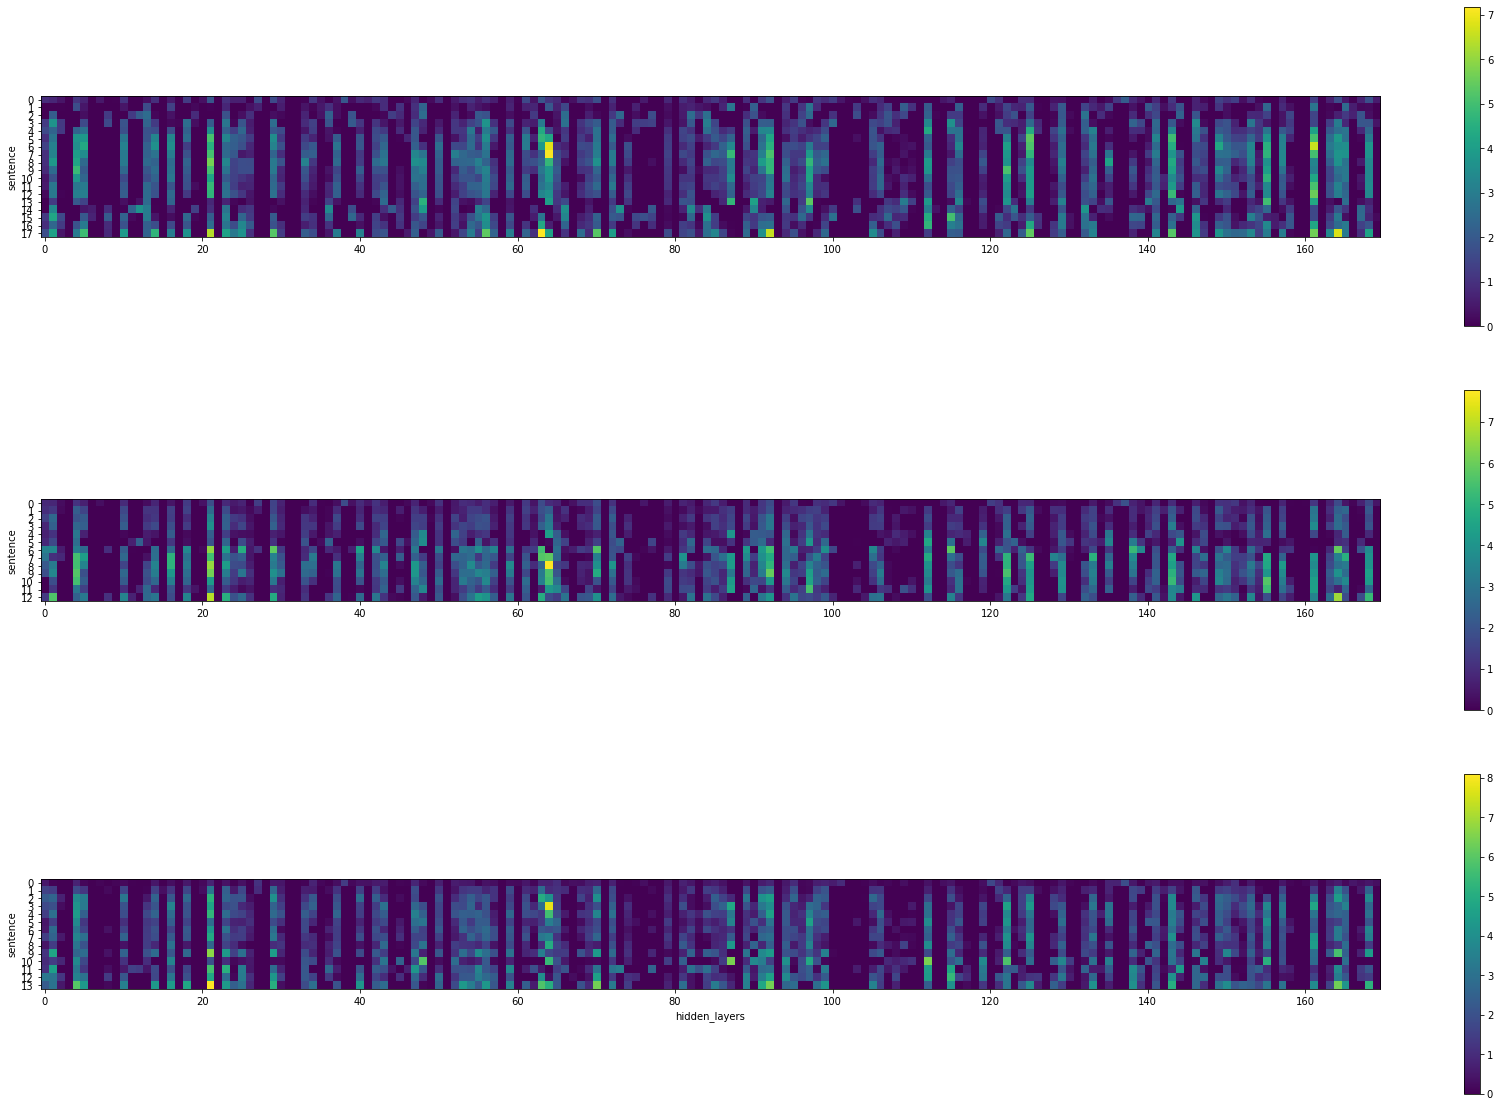

In [ ]:
import matplotlib.pyplot as plt

### TODO : visualize the per-word activation for each sentence ###
### TODO : be sure to label your axes appropriately, and include a title! ###
sent_vis= []
for acti in acti_out:
  sen=[]
  for ac in acti:
    sen.append(ac.detach().numpy()[0])
  sent_vis.append(sen)
sent_vis[0][0]
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(30, 20))
im1 = ax1.imshow(sent_vis[0])
im2 = ax2.imshow(sent_vis[1])
im3 = ax3.imshow(sent_vis[2])
ax3.set_xlabel('hidden_layers')
ax1.set_ylabel('sentence')
ax1.set_yticks(np.arange(18))
ax2.set_yticks(np.arange(13))
ax3.set_yticks(np.arange(14))
ax2.set_ylabel('sentence')
ax3.set_ylabel('sentence')
cbar = ax1.figure.colorbar(im1, ax=ax1)
cbar = ax2.figure.colorbar(im2, ax=ax2)
cbar = ax3.figure.colorbar(im3, ax=ax3)
print("I'm not completed yet!")

<a name="q9"></a>
[[^^^]](#outline) 
### **Q8: Short Report on Your Visualizations**
Discuss your findings. At which words does your layer show high levels of activation? At which words does your layer show low levels of activation? Looking at your visualizations, describe what the model may be using to make predictions.

#### **A9:**
The following are test sentence for reference:
1. "The White House issued a statement today that both the park and the Lincoln Memorial are closed."
2. "A recent biography on George Washington received excellent reviews from the NYT.",
3. "Oprah never talks about the FBI, and Dr. Phil less so."

- From the heatmap, for the first figure and first sentence, we could find the acitivation is lowest at 1st - 2nd tokens and 14 - 15th tokens, which corresponding to the "While House" and "Lincoln Memorial" which are "B-"s tags, obviously different than other token which are "O" tags
- For the second figure and second sentence, we could find the acitivation is lowest at 5 - 6th tokens and around 11th tokens, which corresponding to the "George Washington" and "NYT" which are "B-"s tags, the activation level obviously different than other token which are "O" tags
- The third figure is a little bit noisy, the NER tags except "O" corresponding to "Oprah" 1st, "FBI" 6th, and "Dr. Phil" 8th. It's a little bit hard to tell them from the "O" tags. I think we could use tanh, or change the hidden layer dimension for improvement

<a name="part6"></a>
[[^^^]](#outline) 
# **Part 6: Review Questions**
Finally, ou will need to answer the five questions below. We expect answers to be to-the-point; answers that are vague, meandering, or imprecise *will receive fewer points* than a precise but partially correct answer.

<a name="q10"></a>
[[^^^]](#outline) 
### **Q10: Model Comparisons**
Please address the following questions:
- How does your FFNN model perform in relation to your HMM and MEMM models? 
- How about the comparison between the first RNN and the FFNN? 
- For both comparisons, how did you expect the accuracy to change and why? What are the actual results that you observed? 

#### **A10:**
our FFNN model perform much better than our HMM and MEMM models, especailly MEMM model, because FFNN model can extract features automatically rather than MEMM model.

Our first RNN model has accuracy around 0.938, while FFNN model has accuracy 0.91. That means our first RN model perform better than our FFNN model.

I will expect FFNN model should have higher accuracy than HMM model but similar accuracy with MEMM. That is because, in HW 1, HMM only consider the influence of previous one word, although it would have accumulated influnce from all the previous words, it only depends on the word itself rather than several features extracted by doing word embedding and activation function (non-linear transformation). However, MEMM will consider several features and take these features into logistics regression, which is like Neural Network. Therefore, if researcher can manually extract features successfully, they should get similar accuracy. The actual results is that our FFNN model do have higher accuracy than HMM but the accuracy of MEMM is pretty low.

For RNN, I will expect RNN should have higher accuracy than the other 3 model, because RNN can not only take the embedding as input and automatically adjust the weight of these featurs like FFNN, but can allow the weighting feature from previous words in the sentences to influence the current process. the acutal result shows RNN does has higher accuracy than all other 3 models.

<a name="q11"></a>
[[^^^]](#outline) 
### **Q11: RNNs vs. FFNNs**

How do RNNs incorporate sequential information differently than FFNNs?

#### **A11:**
FFNNs only process sequential information seperately, which means the previous information does not influence current process. RNN will allow the previous information to influence current process.

<a name="q12"></a>
[[^^^]](#outline) 
### **Q12: Markov Assumptions & RNNs**
RNNs are known to struggle with long-distance dependencies. What is a fundamental reason for why this is the case?

#### **A12:**
when a long sentence is processed in sequence by RNN, we all know the hidden layer from previous word will be added into the current hidden layer. However, while doing gradient descent, the problem of vanishing gradient shows, which means the change of hidden layer far from the current layer will have little influence on current layer.

<a name="q13"></a>
[[^^^]](#outline)
### **Q13: Directionality in RNNs**
In applying RNNs to tasks in NLP, we have discovered that (at least for tasks in English) feeding a sentence into an RNN backwards (i.e. inputting the sequence of vectors corresponding to ($course$, $great$, $a$, $is$, $NLP$) instead of ($NLP$, $is$, $a$, $great$, $course$)) tends to improve performance. Why might this be the case?

#### **A13:**
the last word in a sentence is always the most informative word for prediction. Therefore, it should be simpler for rnn model to learn properly select meaningful information rather than starting from the first word which might not be useful at all.

<a name="q14"></a>
[[^^^]](#outline) 
### **Q14: Shortcomings of RNNs**
In using RNNs and word embeddings for NLP tasks, we are no longer required to engineer specific features that are useful for the task; the model discovers them automatically. Stated differently, it seems that neural models tend to discover better features than human researchers can directly specify. This comes at the cost of systems having to consume tremendous amounts of data to learn these kinds of patterns from the data. Beyond concerns of dataset size (and the computational resources required to process and train using this data as well as the further environmental harm that results from this process), why might we disfavor RNN models?

#### **A14:**
the problem of vanishing gradient will disfavor RNN models

<a name="part7"></a>
[[^^^]](#outline) 
# **Part 7: Kaggle Submission**

**BASELINES TO BE ADDED BY FRIDAY, SEPT. 30TH.**

Using the best-performing FFNN and RNN models, generate predictions for the test set, and submit them to Kaggle competition. 

Below, we will use the same output output function from HW1: `create_submission`. This function submits given predicted tokens and associated token indices in the correct format. As such, we will use the `format_output_labels` functions from HW1 as well.

Submissions to Kaggle should be a CSV file consisting of five lines and two columns. The first line is a fixed header, and each of the remaining four lines corresponds to one of the four types of named entities. The first column is the label identifier *Id* (one of PER, LOC, ORG or MISC), and the second column *Predicted* is a list of entities (separated by single space) that you predict to be of that type. Each entity is specified by its starting and ending index (concatenated by a hypen) as given in the test corpus. 

You can use the function **create_submission** that takes the list of predicted labels and the list of associated token indices as inputs and creates the the output CSV file at a specified path.

NOTE: Ensure that there are **no** rows with *Id* = "O" in your Kaggle Submission.

First, pass your processed test data through the model and keep track of its predictions. We recommend that you pass the test data under the `with torch.no_grad()` environment to speed up your testing (see documentation on `torch.no_grad()` [here](https://pytorch.org/docs/stable/generated/torch.no_grad.html)). 

In [ ]:
import numpy as np

def mean_f1(y_pred_dict, y_true_dict):
    """ 
    Calculates the entity-level mean F1 score given the actual/true and 
    predicted span labels.
    :parameter y_pred_dict: A dictionary containing predicted labels as keys and the 
                            list of associated span labels as the corresponding
                            values.
    :type y_pred_dict: Dict<key [String] : value List[Tuple]>
    :parameter y_true_dict: A dictionary containing true labels as keys and the 
                            list of associated span labels as the corresponding
                            values.
    :type y_true_dict: Dict<key [String] : value List[Tuple]>

    Implementation modified from original by author @shonenkov at
    https://www.kaggle.com/shonenkov/competition-metrics.
    """
    F1_lst = []
    for key in y_true_dict:
        TP, FN, FP = 0, 0, 0
        num_correct, num_true = 0, 0
        preds = y_pred_dict[key]
        trues = y_true_dict[key]
        for true in trues:
            num_true += 1
            if true in preds:
                num_correct += 1
            else:
                continue
        num_pred = len(preds)
        if num_true != 0:
            if num_pred != 0 and num_correct != 0:
                R = num_correct / num_true
                P = num_correct / num_pred
                F1 = 2*P*R / (P + R)
            else:
                F1 = 0      # either no predictions or no correct predictions
        else:
            continue
        F1_lst.append(F1)
    return np.mean(F1_lst)

In [ ]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [ ]:
decode_map = {0:"O",
              1:"B-ORG",
              2:"I-ORG",
              3:"B-PER",
              4:"I-PER",
              5:"B-LOC",
              6:"I-LOC",
              7:"B-MISC",
              8:"I-MISC"}

def decode_ner_category(category_data: List[int])->List[str]:
  decoded_category= []
  for i in range(len(category_data)):
    decoded_category.append(decode_map[category_data[i]])
  return decoded_category

In [ ]:
### TODO : pass the test data through the model ###
with torch.no_grad():
  model.eval()
  predicted_batch = []
  for (input_batch, expected_out, batch_mask) in tqdm(test_loader, leave=False, desc="Testing Batches"):
    flattened_batch_mask = batch_mask.reshape(-1).to(device)
    output = model(input_batch.to(get_device())).to(get_device())
    flattened_output = output.reshape(-1, output.shape[-1])
    _, predicted = torch.max(output, -1)
    flattened_predicted = predicted.reshape(-1)
    need_flattened_predicted = flattened_predicted[flattened_batch_mask]
    predicted_batch.append(need_flattened_predicted)
  predicted_tokens_ffnn = torch.cat((predicted_batch[0],predicted_batch[1],predicted_batch[2],predicted_batch[3],predicted_batch[4],predicted_batch[5], predicted_batch[6]), dim=-1)
  predicted_tokens_ffnn = predicted_tokens_ffnn.tolist()

Testing Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pred_tokens_label_ffnn = decode_ner_category(predicted_tokens_ffnn)

In [ ]:
### TODO : pass the test data through the model ###
with torch.no_grad():
  rnn.eval()
  predicted_batch = []
  for (input_batch, expected_out, batch_mask) in tqdm(test_loader, leave=False, desc="Testing Batches"):
    flattened_batch_mask = batch_mask.reshape(-1).to(device)
    output = rnn(input_batch.to(get_device())).to(get_device())
    flattened_output = output.reshape(-1, output.shape[-1])
    _, predicted = torch.max(output, -1)
    flattened_predicted = predicted.reshape(-1)
    need_flattened_predicted = flattened_predicted[flattened_batch_mask]
    predicted_batch.append(need_flattened_predicted)
  predicted_tokens_rnn = torch.cat((predicted_batch[0],predicted_batch[1],predicted_batch[2],predicted_batch[3],predicted_batch[4],predicted_batch[5], predicted_batch[6]), dim=-1)
  predicted_tokens_rnn = predicted_tokens_rnn.tolist()

Testing Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pred_tokens_label_rnn = decode_ner_category(predicted_tokens_rnn)

In [ ]:
### TODO : pass the test data through the model ###
with torch.no_grad():
  rnn2.eval()
  predicted_batch = []
  for (input_batch, expected_out, batch_mask) in tqdm(test_loader, leave=False, desc="Testing Batches"):
    flattened_batch_mask = batch_mask.reshape(-1).to(device)
    output = rnn2(input_batch.to(get_device())).to(get_device())
    flattened_output = output.reshape(-1, output.shape[-1])
    _, predicted = torch.max(output, -1)
    flattened_predicted = predicted.reshape(-1)
    need_flattened_predicted = flattened_predicted[flattened_batch_mask]
    predicted_batch.append(need_flattened_predicted)
  predicted_tokens_rnn2 = torch.cat((predicted_batch[0],predicted_batch[1],predicted_batch[2],predicted_batch[3],predicted_batch[4],predicted_batch[5], predicted_batch[6]), dim=-1)
  predicted_tokens_rnn2 = predicted_tokens_rnn2.tolist()

Testing Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pred_tokens_label_rnn2 = decode_ner_category(predicted_tokens_rnn2)

Finally, extract the labels and indices for where your model predicts a named entity and pass it through the `create_submission` function:

In [ ]:
### TODO : extract labels and indices for model predictions of named entities ###
token_indices = flatten_list(test["index"])

In [ ]:
def format_output_labels(token_labels, token_indices):
    """
    Returns a dictionary that has the labels (LOC, ORG, MISC or PER) as the keys, 
    with the associated value being the list of entities predicted to be of that key label. 
    Each entity is specified by its starting and ending position indicated in [token_indices].

    Eg. if [token_labels] = ["B-ORG", "I-ORG", "O", "O", "B-ORG"]
           [token_indices] = [15, 16, 17, 18, 19]
        then dictionary returned is 
        {'LOC': [], 'MISC': [], 'ORG': [(15, 16), (19, 19)], 'PER': []}

    :parameter token_labels: A list of token labels (eg. B-PER, I-PER, B-LOC, I-LOC, B-ORG, I-ORG, B-MISC, OR I-MISC).
    :type token_labels: List[String]
    :parameter token_indices: A list of token indices (taken from the dataset) 
                              corresponding to the labels in [token_labels].
    :type token_indices: List[int]
    """
    label_dict = {"LOC":[], "MISC":[], "ORG":[], "PER":[]}
    prev_label = 'O'
    start = token_indices[0]
    for idx, label in enumerate(token_labels):
      curr_label = label.split('-')[-1]
      if label.startswith('B-') or curr_label != prev_label:
        if prev_label != 'O':
          label_dict[prev_label].append((start, token_indices[idx-1]))
        if curr_label != 'O':
          start = token_indices[idx]
        else:
          start = None
      
      prev_label = curr_label

    if start is not None and prev_label != 'O':
      label_dict[prev_label].append((start, token_indices[idx]))
    return label_dict

In [ ]:
import csv

def create_submission(output_filepath, token_labels, token_inds):
    """
    :parameter output_filepath: The full path (including file name) of the output file, 
                                with extension .csv
    :type output_filepath: [String]
    :parameter token_labels: A list of token labels (eg. PER, LOC, ORG or MISC).
    :type token_labels: List[String]
    :parameter token_indices: A list of token indices (taken from the dataset) 
                              corresponding to the labels in [token_labels].
    :type token_indices: List[int]
    """
    label_dict = format_output_labels(token_labels, token_inds)
    with open(output_filepath, mode='w') as csv_file:
        fieldnames = ['Id', 'Predicted']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        for key in label_dict:
            p_string = " ".join([str(start)+"-"+str(end) for start,end in label_dict[key]])
            writer.writerow({'Id': key, 'Predicted': p_string})

In [ ]:
y_pred_dict_ffnn = format_output_labels(pred_tokens_label_ffnn, token_indices)
y_pred_dict_rnn = format_output_labels(pred_tokens_label_rnn, token_indices)
y_pred_dict_rnn2 = format_output_labels(pred_tokens_label_rnn2, token_indices)

In [ ]:
with torch.no_grad():
  rnn.eval()
  predicted_batch = []
  for (input_batch, expected_out, batch_mask) in tqdm(test_loader, leave=False, desc="Testing Batches"):
    flattened_batch_mask = batch_mask.reshape(-1).to(device)
    output = rnn(input_batch.to(get_device())).to(get_device())
    flattened_output = output.reshape(-1, output.shape[-1])
    _, predicted = torch.max(output, -1)
    flattened_predicted = predicted.reshape(-1)
    need_flattened_predicted = flattened_predicted[flattened_batch_mask]
    predicted_batch.append(need_flattened_predicted)
  predicted_tokens_rnn = torch.cat((predicted_batch[0],predicted_batch[1],predicted_batch[2],predicted_batch[3],predicted_batch[4],predicted_batch[5], predicted_batch[6]), dim=-1)
  predicted_tokens_rnn = predicted_tokens_rnn.tolist()

Testing Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pred_tokens_label_rnn = decode_ner_category(predicted_tokens_rnn)

In [ ]:
y_pred_dict_rnn = format_output_labels(pred_tokens_label_rnn, token_indices)

In [ ]:
true_token_label = flatten_list(val["NER"])
token_indices = flatten_list(val["index"])

In [ ]:
y_true_dict = format_output_labels(true_token_label, token_indices)

print("Entity Level Mean F1 score is : " + str(mean_f1(y_pred_dict_rnn, y_true_dict)))

Entity Level Mean F1 score is : 0.0


In [ ]:
output_filepath = os.path.join(os.getcwd(), "drive", "MyDrive", "ffnn") + ".csv"
create_submission(output_filepath, pred_tokens_label_ffnn, token_indices)

In [ ]:
output_filepath = os.path.join(os.getcwd(), "drive", "MyDrive", "rnn") + ".csv"
create_submission(output_filepath, pred_tokens_label_rnn, token_indices)

In [ ]:
output_filepath = os.path.join(os.getcwd(), "drive", "MyDrive", "rnn2") + ".csv"
create_submission(output_filepath, pred_tokens_label_rnn2, token_indices)

## **Baselines**

On [Kaggle](https://www.kaggle.com/t/4d2c7eeebdfc4e789d79d3a96299dbb0), we will provide two baselines for you to evaluate your models against: **`FFNN TA Baseline`** (around 0.20) and **`RNN TA Baseline`** (around 0.29). You may use them to internally check your models. 

---
<a name="q15"></a>
## **Q15: Competition Score**
[[^^^]](#outline) 


Include your team's **best score** (for a valid FFNN implementation and a valid RNN implementation) and the **name under which that best score was submitted** from Kaggle. See CMS for full instructions.

#### **A15:**

best score: 0.32001
name: rnn.csv (from team Zhejun He)